In [1]:
library(GLMsData)
library(statmod)
library(MASS)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(ants)

In [3]:
str(ants)

'data.frame':	44 obs. of  5 variables:
 $ Site     : Factor w/ 22 levels "ARC","BH","CAR",..: 21 9 6 17 4 16 14 12 20 1 ...
 $ Srich    : int  6 16 18 17 9 15 7 12 14 9 ...
 $ Habitat  : Factor w/ 2 levels "Bog","Forest": 2 2 2 2 2 2 2 2 2 2 ...
 $ Latitude : num  42 42 42 42 42 ...
 $ Elevation: int  389 8 152 1 210 78 47 491 121 95 ...


In [4]:
ants

Site,Srich,Habitat,Latitude,Elevation
TPB,6,Forest,41.97,389
HBC,16,Forest,42.00,8
CKB,18,Forest,42.03,152
SKP,17,Forest,42.05,1
CB,9,Forest,42.05,210
RP,15,Forest,42.17,78
PK,7,Forest,42.19,47
OB,12,Forest,42.23,491
SWR,14,Forest,42.27,121
ARC,9,Forest,42.31,95


In [10]:
glm.1 <- glm(Srich ~ Habitat + Latitude + Elevation, data=ants, family=poisson)

In [11]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),11.936812111,2.6214970400,4.553433,5.277739e-06
HabitatForest,0.635438863,0.1195663840,5.314528,1.069343e-07
Latitude,-0.235793020,0.0616637999,-3.823848,1.313847e-04
Elevation,-0.001141079,0.0003748977,-3.043708,2.336820e-03


In [13]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,43,102.76331,NA
Habitat,1,29.685569,42,73.07774,5.081168e-08
Latitude,1,22.793472,41,50.28427,1.803774e-06
Elevation,1,9.593822,40,40.69044,1.952331e-03


In [15]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1))
pchisq(gof.pearson, df=df.residual(glm.1))

gof.dev/df.residual(glm.1)
gof.pearson/df.residual(glm.1)

[1] 0.5601191

[1] 0.5806144

[1] 1.017261

[1] 1.029128

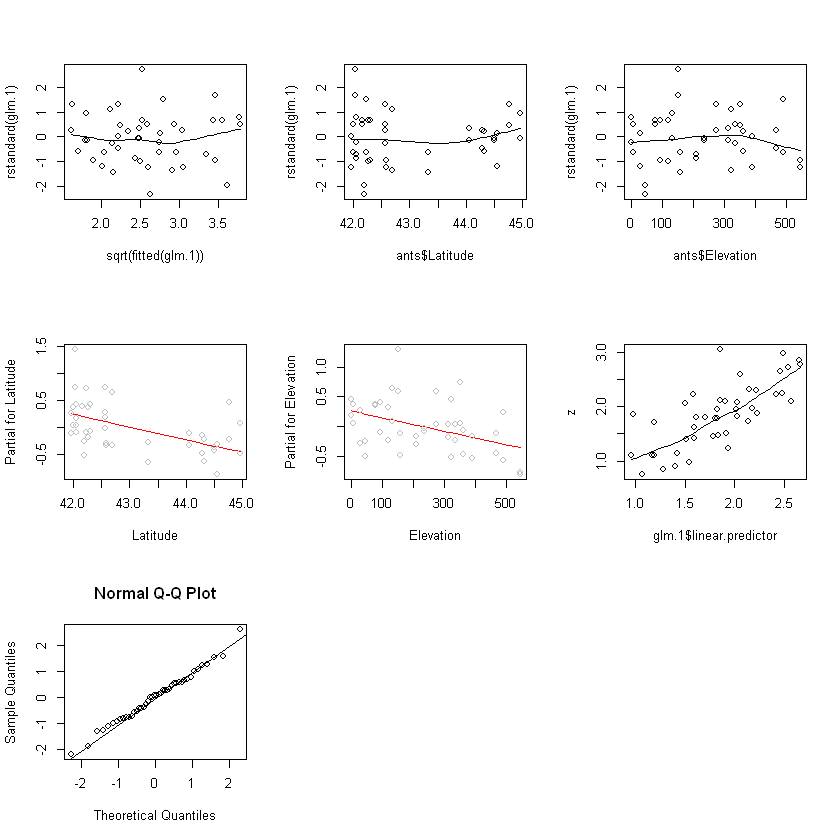

In [22]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ sqrt(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ ants$Latitude)
scatter.smooth(rstandard(glm.1) ~ ants$Elevation)
termplot(glm.1, partial.resid = TRUE, terms="Latitude")
termplot(glm.1, partial.resid = TRUE, terms="Elevation")
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
qqnorm(qresid(glm.1))
qqline(qresid(glm.1))

In [24]:
extractAIC(glm.1)
extractAIC(glm.1, k=nobs(glm.1))

[1]   4.0000 209.0445

[1]   4.0000 377.0445